In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import numpy as np
import os

In [6]:
np_temp = np.load('DB40.npz')
X = np_temp['X_data']
y = np_temp['y_data']

In [7]:
np_t = np.load('DB40_test.npz')
X_test = np_t['X_data']
y_test = np_t['y_data']

In [8]:
X.shape

(12000, 1600)

In [6]:
#X1 = X.reshape(12000,1600)

In [7]:
#X1_test = X_test.reshape(3000,1600)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=None)

In [10]:
dtree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [11]:
print(dtree.tree_.node_count)

7989


In [12]:
print(dtree.tree_.max_depth)

21


In [13]:
pred = dtree.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

#error_rate = 1 - accuracy_score(pred,y_test)
#print('Error rate',error_rate)
print('Accuracy', accuracy_score(pred,y_test))

Accuracy 0.324


In [11]:
values = np.arange(5,51,5)

In [12]:
print(values)

[ 5 10 15 20 25 30 35 40 45 50]


In [13]:
from sklearn.model_selection import cross_val_score
cv_scs = {}
for i in values:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i,random_state=0)
    cv_scs[i]= cross_val_score(clf, X, y, cv=5, n_jobs=-1)
    print(i)

5
10
15
20
25
30
35
40
45
50


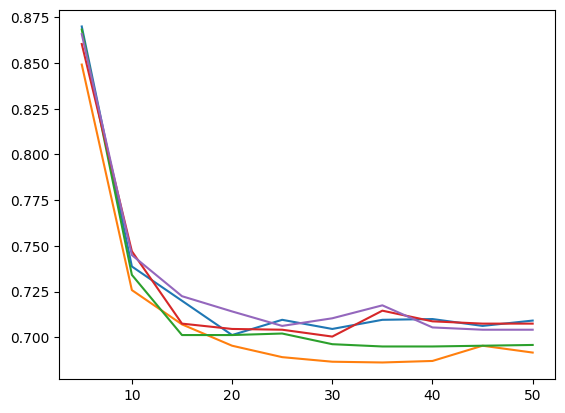

In [14]:
import matplotlib.pyplot as plt
error_score=[]
for i in cv_scs.values():
    error_score.append(1-i)
plt.plot(cv_scs.keys(),error_score)
plt.show()

In [15]:
values = np.arange(5,51,5)

In [20]:
from sklearn.model_selection import cross_val_score
cv_scs = {}
for i in values:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i,random_state=0)
    s = cross_val_score(clf, X, y, cv=2, n_jobs=-1)
    cv_scs[i] = s
    print("max_depth = " + str(i) + "\tScore = " + str(s))

max_depth = 5	Score = [0.13783333 0.12583333]
max_depth = 10	Score = [0.2405 0.227 ]
max_depth = 15	Score = [0.25866667 0.25866667]
max_depth = 20	Score = [0.2605 0.2625]
max_depth = 25	Score = [0.262      0.26233333]
max_depth = 30	Score = [0.26166667 0.263     ]
max_depth = 35	Score = [0.26483333 0.26383333]
max_depth = 40	Score = [0.26383333 0.264     ]
max_depth = 45	Score = [0.26216667 0.26266667]
max_depth = 50	Score = [0.2625     0.26266667]


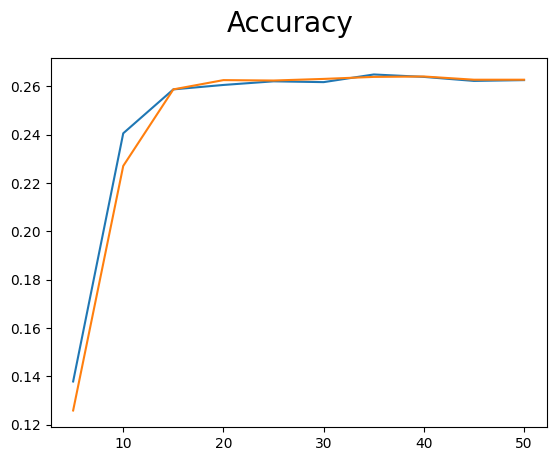

In [24]:
import matplotlib.pyplot as plt
acc_score=[]
for i in cv_scs.values():
    acc_score.append(i)
plt.plot(cv_scs.keys(),acc_score)
plt.suptitle('Accuracy', fontsize=20)
plt.show()